In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Ecommerce Customers.csv', na_values=['missing', 'xx', '?', 'x', '-'])
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### numerical columns do not have strange data

In [5]:
len(df['Email'].unique())

500

In [6]:
len(df['Address'].unique())

500

In [7]:
df['Avatar'].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

In [8]:
df.corr()['Yearly Amount Spent']

Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

### "Times on Website" column have very weak correlation with "Yearly Amount Spent" column so we can drop it

In [9]:
df.drop('Time on Website', axis=1, inplace=True)

In [10]:
numerical_cols = list(df.select_dtypes(include=np.number))
categorical_cols = list(df.select_dtypes(include=object))

<AxesSubplot:ylabel='Avg. Session Length'>

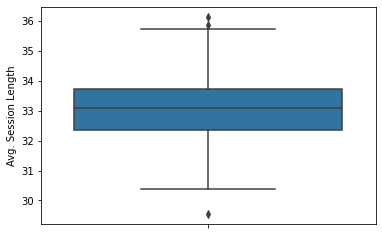

In [11]:
sns.boxplot(y=numerical_cols[0], data=df)

<AxesSubplot:ylabel='Time on App'>

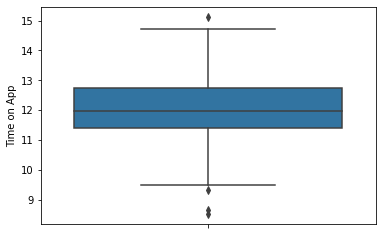

In [12]:
sns.boxplot(y=numerical_cols[1], data=df)

<AxesSubplot:ylabel='Length of Membership'>

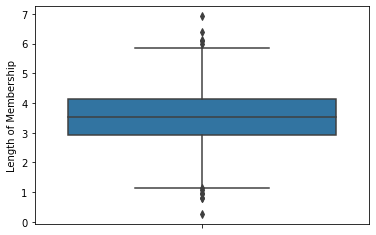

In [13]:
sns.boxplot(y=numerical_cols[2], data=df)

<AxesSubplot:ylabel='Yearly Amount Spent'>

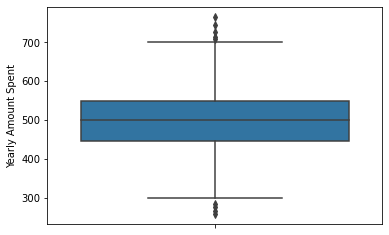

In [14]:
sns.boxplot(y=numerical_cols[3], data=df)

In [15]:
for col in numerical_cols:
    out_indices = detect_outliers(df, 0, [col])
    print(f"col {col} ---->{out_indices}")

col Avg. Session Length ---->[12, 154, 390]
col Time on App ---->[65, 309, 362, 442]
col Length of Membership ---->[50, 151, 153, 157, 161, 173, 225, 303, 379, 396, 434, 447]
col Yearly Amount Spent ---->[50, 65, 157, 205, 225, 299, 303, 368, 415]


### the outliers are not strange and have some meaning so we do not need to edit them

In [16]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### our data is clean, have no missing data

### Categorical columns do not have effect on the result so we can drop them

In [17]:
df.drop(categorical_cols, axis=1, inplace=True)

### Setting x_columns and y_column

In [18]:
x = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']
x

,Avg. Session Length,Time on App,Length of Membership
0,34.497268,12.655651,4.082621
1,31.926272,11.109461,2.664034
2,33.000915,11.330278,4.104543
3,34.305557,13.717514,3.120179
4,33.330673,12.795189,4.446308
...,...,...,...
495,33.237660,13.566160,3.746573
496,34.702529,11.695736,3.576526
497,32.646777,11.499409,4.958264
498,33.322501,12.391423,2.336485


In [19]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

### split the data to training and testing data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
print(f"{x_train.shape} || {x_test.shape} || {y_train.shape} || {y_test.shape}")

(400, 3) || (100, 3) || (400,) || (100,)


### scaling features

In [22]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Compare regression algorithms

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}

In [25]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    print('-----------------------------------------------------------')

Using model: LinearRegression
RMSE: 8.911169816911809
R2 Score: 0.9885022432054614
-----------------------------------------------------------
Using model: KNeighborsRegressor
RMSE: 21.629351441555457
R2 Score: 0.9322622646914739
-----------------------------------------------------------
Using model: SVR
RMSE: 61.3362068966666
R2 Score: 0.4552747479111371
-----------------------------------------------------------
Using model: DecisionTreeRegressor
RMSE: 26.554140545096644
R2 Score: 0.8979041293041907
-----------------------------------------------------------
Using model: RandomForestRegressor
RMSE: 17.298415735626925
R2 Score: 0.9566732274872295
-----------------------------------------------------------
Using model: XGBRegressor
RMSE: 15.268967626580652
R2 Score: 0.9662430635012375
-----------------------------------------------------------


### Linear regression algorithm is the most suitable for this application

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [27]:
for x in zip(y_predict, y_test):
    print(x)

(466.61633229092854, 471.602884392892)
(411.6712719166395, 404.8245288726869)
(619.5501770423759, 596.4301726172283)
(475.04734891233096, 475.759067788328)
(434.93678887639425, 423.3083340974698)
(596.049840299744, 605.061038804892)
(449.80121557334587, 432.48116855701767)
(576.5930415568928, 576.0252441251166)
(480.03753935926574, 478.1830597118797)
(514.1830245333423, 522.3374046069357)
(584.0921969406808, 574.6548433659395)
(432.4488609868114, 426.154547713103)
(525.7313168434648, 506.5363931400864)
(518.7721762639125, 502.4097853029053)
(473.6364337197131, 475.0154070877503)
(500.2141953087335, 512.8253581285203)
(471.9580850121555, 484.5198091105511)
(522.9339432713361, 520.8987944502368)
(470.7020650296243, 483.15972078451705)
(472.4651831136155, 479.23109291159307)
(594.4592485081854, 587.9510539684005)
(305.25102959319526, 298.76200786180766)
(504.96944808441907, 501.100245232053)
(397.3631542238606, 392.8103449837973)
(554.1590880609675, 553.6015346844503)
(591.0466226613916, 